## Import Statments

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string

## Load Dataset

In [4]:
PATH = "../data/IMDB Dataset.csv"
df = pd.read_csv(PATH)

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Start of Exploratory Data Analysis

### 1. Simple overview of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Perform value counts on the sentiment distribution of the dataset.

<Axes: xlabel='sentiment'>

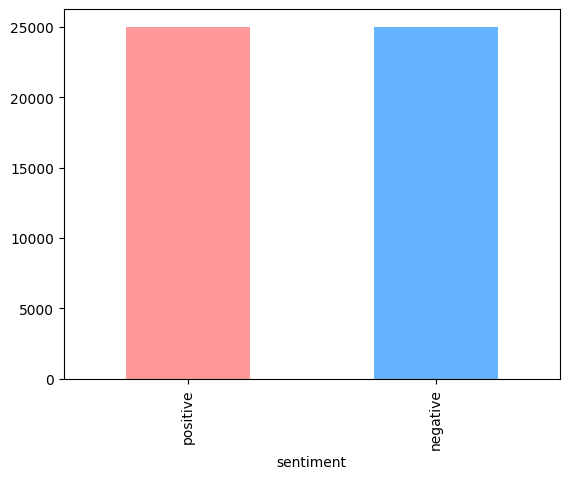

In [7]:
df['sentiment'].value_counts().plot(kind='bar', color=['#FF9999', '#66B3FF'])

We have a balanced dataset with 50% positive and 50% negative sentiments.

- Now let's visualize the length of the reviews in the dataset.


In [8]:
length = df['review'].apply(lambda x: len(x.split()))

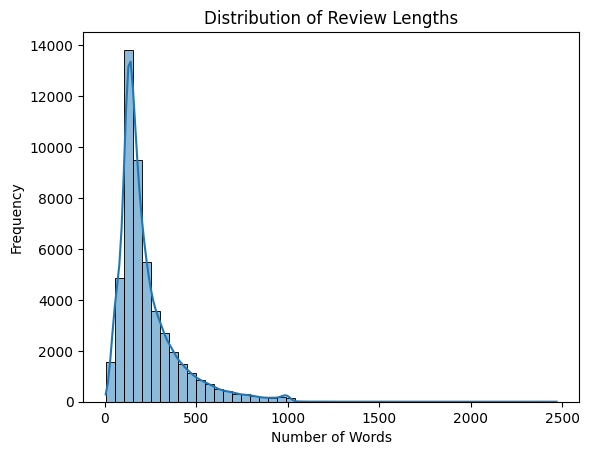

In [9]:
sns.histplot(length, bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.savefig("review_length_distribution.png")
plt.show()

We have a right skewed distribution of review lengths, with most reviews being relatively short (less than 200 words) and a few longer reviews.

### 2. Perform analysis on the word distribution in the dataset

In [10]:
from collections import Counter
import re

In [20]:
def get_top_words(sentiment, text_column = "review", n=20):
    """
    A function to get the top n words for a given sentiment in the dataset.
    """
    reviews = df[df['sentiment'] == sentiment][text_column].str.lower()
    all_words = ' '.join(reviews).translate(str.maketrans('', '', string.punctuation))
    words = re.findall(r'\b\w+\b', all_words)
    common_words = Counter(words).most_common(n)
    return pd.DataFrame(common_words, columns=['Word', 'Count'])


In [12]:
top_pos = get_top_words('positive')
top_neg = get_top_words('negative')

Plot the top 20 words for positive and negative sentiments.

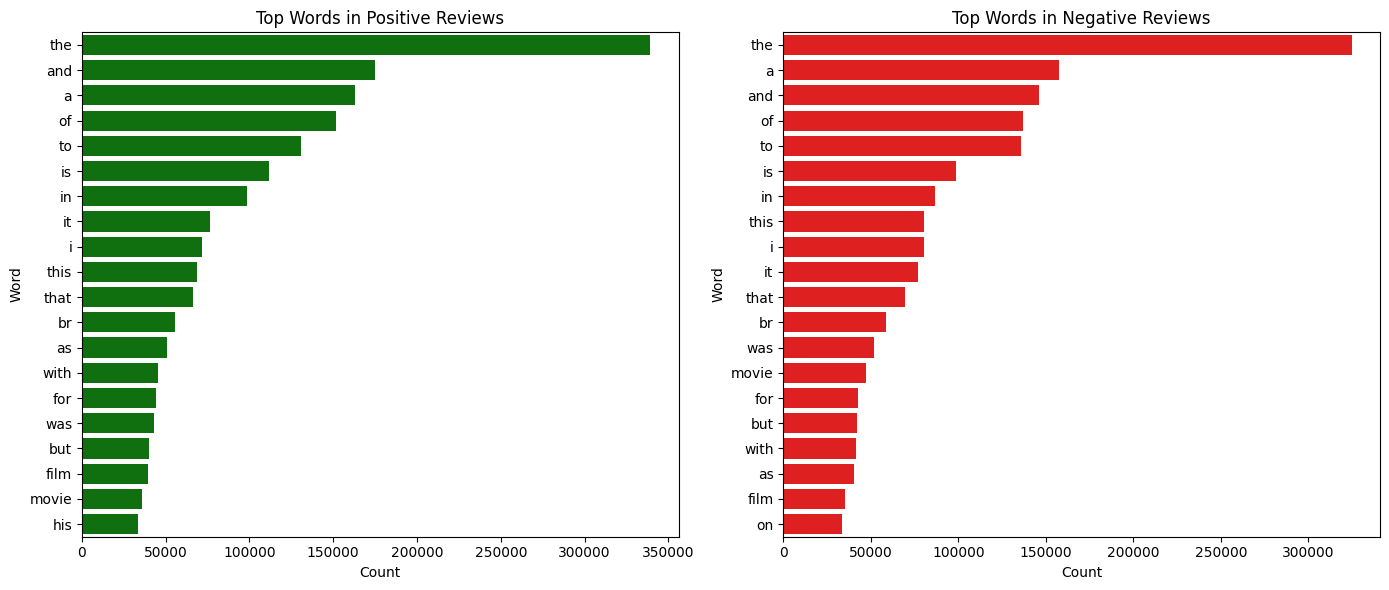

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(data=top_pos, y='Word', x='Count', ax=axes[0], color='green')
axes[0].set_title("Top Words in Positive Reviews")

sns.barplot(data=top_neg, y='Word', x='Count', ax=axes[1], color='red')
axes[1].set_title("Top Words in Negative Reviews")

plt.tight_layout()
plt.savefig("top_words.png")
plt.show()

As expected the top words for both cases are stop words like 'the', 'and', 'is', etc. Now let us remove these stop words and plot the top 20 words again.

- import nltk and download the stopwords corpus

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\VICTUS
[nltk_data]     16\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

- remove stopwords from the reviews

In [16]:
from nltk.corpus import stopwords
import string
import re

def remove_stopwords(df, text_column='review', new_column='clean_review'):
    """
    A function to remove stopwords from a specified text column in a DataFrame.
    """
    stop_words = set(stopwords.words('english'))
    
    def clean_text(text):
        # Lowercase, remove punctuation, and split into words
        text = text.lower()
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        words = text.split()
        # Remove stopwords
        filtered_words = [word for word in words if word not in stop_words]
        return ' '.join(filtered_words)
    
    df[new_column] = df[text_column].astype(str).apply(clean_text)
    return df

In [18]:
df = remove_stopwords(df)

- plot the top 20 words for positive and negative sentiments again

In [21]:
top_pos = get_top_words('positive', text_column = 'clean_review')
top_neg = get_top_words('negative', text_column = 'clean_review')

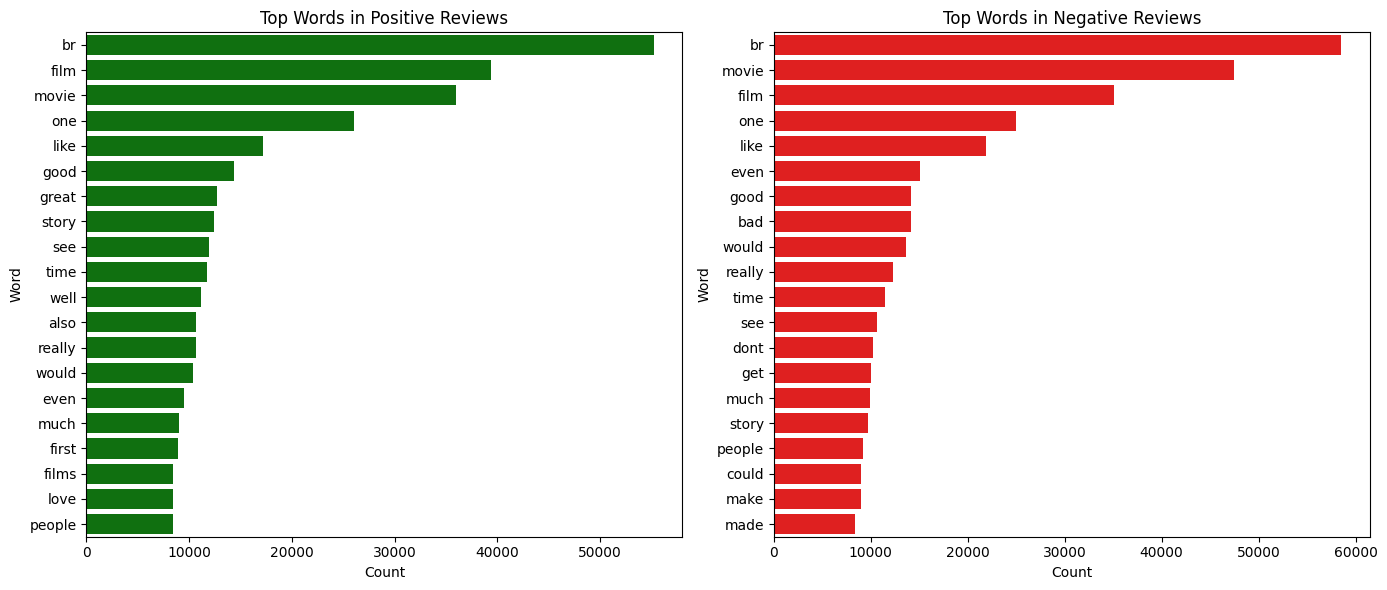

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(data=top_pos, y='Word', x='Count', ax=axes[0], color='green')
axes[0].set_title("Top Words in Positive Reviews")

sns.barplot(data=top_neg, y='Word', x='Count', ax=axes[1], color='red')
axes[1].set_title("Top Words in Negative Reviews")

plt.tight_layout()
plt.savefig("top_words.png")
plt.show()

Observation:
- The top word is br in both cases which is a line break character, which is not useful for our analysis. We can remove this from the top words.
- The top words for positive sentiment to mention some are 'good', 'great', 'love'. Which indicates that the reviews are generally positive.
    - We also contain words like 'much', 'like', 'would' which are not very informative.

- The top words for negative sentiment to metion some are 'bad', 'dont'. Which indicates that the reviews are generally negative.
    - We also contain words like 'much', 'like', 'would' which are not very informative.

Let us drop the top word 'br' from the top words for both positive and negative sentiments and create a wordcloud for the top words.

In [27]:
from wordcloud import WordCloud
from collections import Counter
import re
import string



def get_top_words_filtered(sentiment, n=100):
    """
    A function to get the top n words for a given sentiment in the dataset,
    excluding 'br' and stopwords.
    """
    stop_words = set(stopwords.words('english'))
    reviews = df[df['sentiment'] == sentiment]['review'].str.lower()
    all_words = ' '.join(reviews).translate(str.maketrans('', '', string.punctuation))
    words = re.findall(r'\b\w+\b', all_words)
    
    
    # Remove 'br' and stopwords
    filtered = [w for w in words if w not in stop_words and w != 'br']
    return dict(Counter(filtered).most_common(n))

In [28]:
top_pos_words = get_top_words_filtered('positive', 100)
top_neg_words = get_top_words_filtered('negative', 100)

In [29]:
# Create WordClouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(top_pos_words)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate_from_frequencies(top_neg_words)

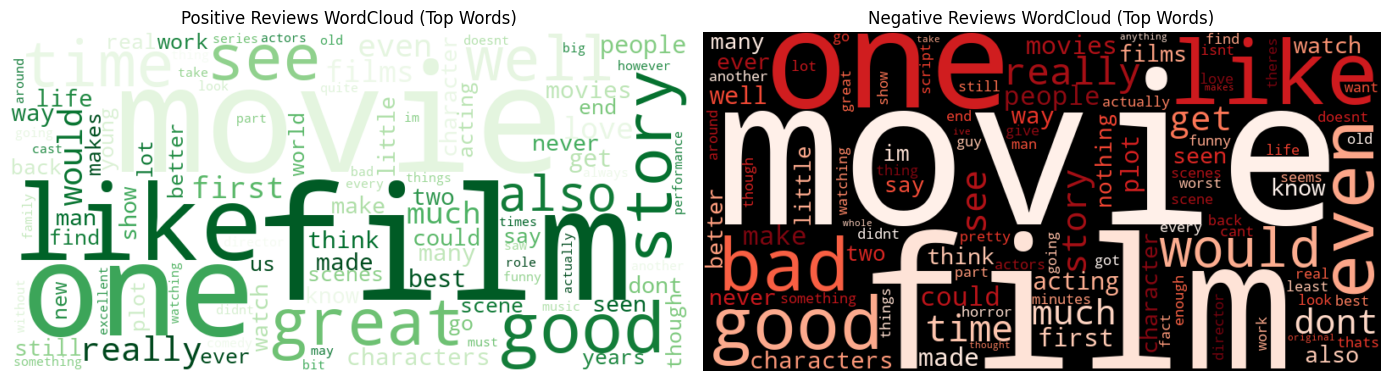

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud (Top Words)")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud (Top Words)")

plt.tight_layout()
plt.savefig("top_words_wordclouds.png")
plt.show()